In [1]:
import torch
from torch import nn
from torch.autograd import Variable
from torchvision import transforms
from torchvision.models import vgg16
from torch.optim import Adam

from models import JohnsonSR
from datasets import SuperResolutionDataset
from criterion import ContentLoss
from train_utils import prep_img, fit, save_checkpoint

## Dataset Setup

In [2]:
trans = transforms.ToTensor()
to_pil = transforms.ToPILImage()

In [3]:
path = '/home/austin/data/ILSVRC/test'
srdata = SuperResolutionDataset(path, transforms=trans,
                                small_size=(72, 72),
                                large_size=(288, 288))

## Transformation Network

<img src="johnsonsr.png" />

In [4]:
srnet = JohnsonSR()
srnet.cuda()

JohnsonSR (
  (batch_norm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True)
  (conv_in): ConvBatchRelu (
    (conv): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  )
  (resblock): ResBlock (
    (conv3x3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  )
  (upblock): UpBlock (
    (upsample): Upsample(scale_factor=2, mode=nearest)
    (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  )
  (conv_out): Conv2d(64, 3, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
)

## Define Loss Network

<img src="content_loss.png" />

In [5]:
vgg = vgg16(pretrained=True)
relu2_2 = nn.Sequential(*list(vgg.features)[:9])
relu2_2.eval()
relu2_2.cuda()

Sequential (
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU (inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU (inplace)
  (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU (inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU (inplace)
)

## Train

In [6]:
optimizer = Adam(srnet.parameters(), lr=1e-3)
criterion = ContentLoss(loss_network=relu2_2)

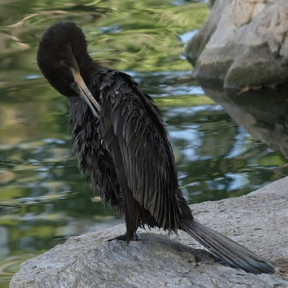

In [7]:
to_pil(srdata[0][1])

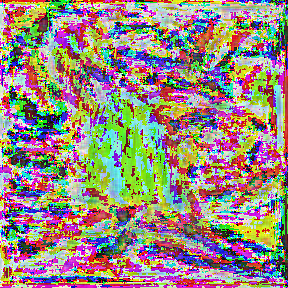

In [8]:
out = srnet(prep_img(srdata[0][0]))
to_pil(out.data.cpu()[0])

In [9]:
history = fit(srnet, srdata, criterion, optimizer, batch_size=8, num_workers=8)

Train on 5500 samples


[loss: 4.4420 ]



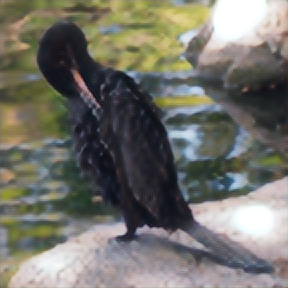

In [10]:
out = srnet(prep_img(srdata[0][0]))
to_pil(out.data.cpu()[0])

Train on 5500 samples


[loss: 3.4977 ]


[loss: 3.3471 ]



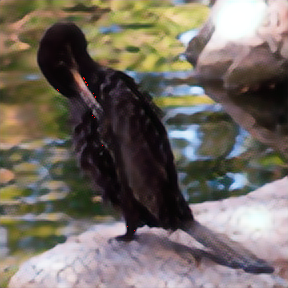

In [11]:
history = fit(srnet, srdata, criterion, optimizer, batch_size=8, num_workers=8, nb_epoch=2)
out = srnet(prep_img(srdata[0][0]))
to_pil(out.data.cpu()[0])

Train on 5500 samples


[loss: 3.1972 ]


[loss: 3.0968 ]



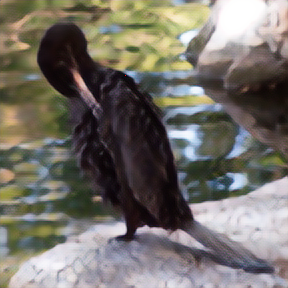

In [12]:
history = fit(srnet, srdata, criterion, optimizer, batch_size=8, num_workers=8, nb_epoch=2)
out = srnet(prep_img(srdata[0][0]))
to_pil(out.data.cpu()[0])

In [13]:
save_checkpoint(srnet.state_dict(), optimizer.state_dict(),'johnson_pl_bn_5epoch.pth.tar')

Train on 5500 samples


[loss: 3.0607 ]


[loss: 2.9926 ]



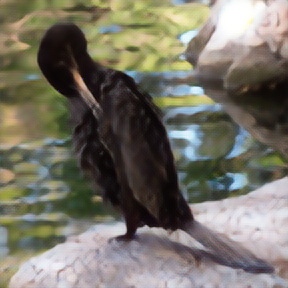

In [14]:
history = fit(srnet, srdata, criterion, optimizer, batch_size=8, num_workers=8, nb_epoch=2)
out = srnet(prep_img(srdata[0][0]))
to_pil(out.data.cpu()[0])

Train on 5500 samples


[loss: 2.9869 ]


[loss: 2.9356 ]



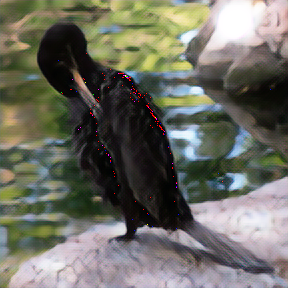

In [20]:
history = fit(srnet, srdata, criterion, optimizer, batch_size=8, num_workers=8, nb_epoch=2)
out = srnet(prep_img(srdata[0][0]))
to_pil(out.data.cpu()[0])

Train on 5500 samples


[loss: 2.9721 ]


[loss: 2.9098 ]



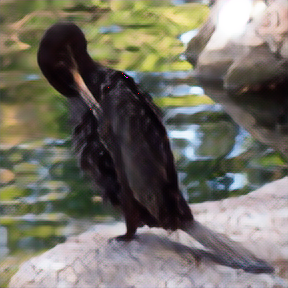

In [26]:
history = fit(srnet, srdata, criterion, optimizer, batch_size=8, num_workers=8, nb_epoch=2)
out = srnet(prep_img(srdata[0][0]))
to_pil(out.data.cpu()[0])

## Low Res Image

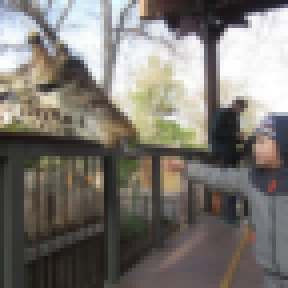

In [31]:
to_pil(srdata[2][0]).resize((288, 288))

## Model output

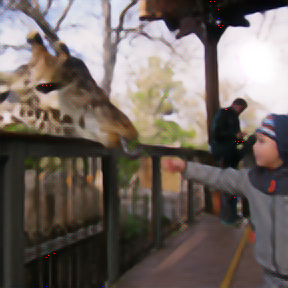

In [42]:
out = srnet(prep_img(srdata[2][0]))
to_pil(out.data.cpu()[0])

## target

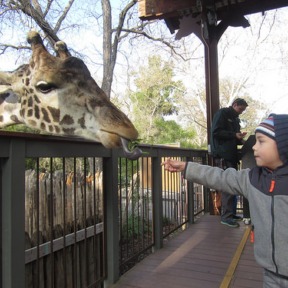

In [33]:
to_pil(srdata[2][1])